In [5]:
from modules import function
from modules import reactions

モノマーSMILESと重合度を引数に取り、重合体のSMILES,および分子体積を返す関数

In [6]:
def polymer_volume(monomer_smiles,dp):
    
    smiles_list = [monomer_smiles]*dp
    polymer_smiles = reactions.Polymerization(smiles_list)
    polymer_sp=function.Krevelen_sp(polymer_smiles)
    dens = polymer_sp.mw/polymer_sp.vol
    return dens,polymer_smiles

In [30]:

ls = [polymer_volume("C=C",i)[0] for i in range(3,11)]
ls

[0.7695930177176603,
 0.7881402708272004,
 0.7990243792865914,
 0.8061066101309908,
 0.8137927828398285,
 0.815343254920787,
 0.8206282943103547,
 0.8228316494917408]

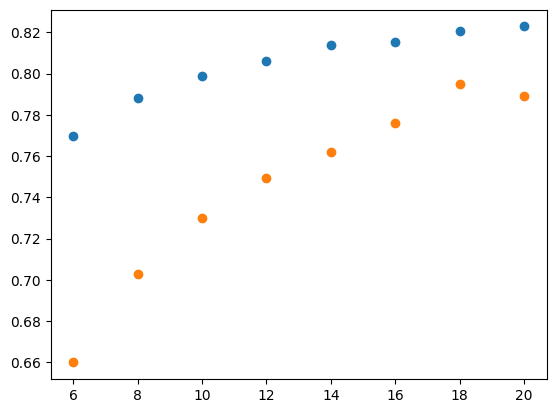

In [32]:
c_number = [6,8,10,12,14,16,18,20]
ls_real = [0.66,0.703,0.730,0.7495,0.762,0.776,0.795,0.789]
import matplotlib.pyplot as plt
plt.scatter(c_number,ls)
plt.scatter(c_number,ls_real)



ポリマー1ユニット当たりの分子体積<モノマーの分子体積

30量体までの分子を生成し、分子力場計算(ETKDG法)により分子のコンホメーションを最適化計算し、
その構造からモル体積を計算した。この手法により計算されたPMMAは重合度に対して線形に分子体積が大きくなったが、
単純なモノマーの分子体積の和ではなく、それよりも小さな値をとった。重合による分子の拘束が、分子体積の低下に影響しているとみられる。モノマーの分子体積和とポリマーの分子体積の差を、重合度nで標準化した値を、付加反応単位での体積減少への寄与$(C_{p})$とすると、


$C_{p}=(1/n)\cdot(\sum_{i=1}^n{V_{M(i)}} - V_{P(n)})$

Cpが意味するのは、モル単位での反応における、モル体積収縮への寄与である。重合前後の体積収縮率が既知のモノマー10種類について、重合度ごとの高分子のSMILESを生成し、それらに対して分子力場計算によるモル体積を見積もった。この結果で得られた計算上の高分子モル体積Vpに対し、重合に使用されたモノマーモル体積Vm(ETKDGによる推算値)の和との差を重合度で標準化したCpは、nが大きくなるにつれて末端基によるファンデルワールス体積への寄与が少なくなり、次第に一反応に対し一定の増分に収束する傾向が見られた。

モノマー種によって若干の違いはあれど、おおよそCpは12 ~ 14(cm3/mol)程度の寄与がある。すなわち1molのモノマーが全て反応した場合、10 ~ 14㎝3分の体積が減少する。従って、モル体積が既知のビニルモノマーが重合した際の、高分子量体のモル体積は下記の式より近似的に求めることが出来る。

$Vp = V_{M}+(n-1)\cdot(V_{M}-C_{P})$

例えば、MMAのモノマーのモル体積は106.56 cm/mol なので、Cp = 14cm3/molとしたとき、

100量体のモル体積は

$Vp = 106.56+(100-1)\cdot(106.56-12) = 9468$

100量体MMAの分子量は10011なので、密度は

$d = 10011/8676 = 1.057 g/mol$

実際のPMMAの密度は


ETKDG法について

「Better Informed Distance Geometry: Using What We Know To Improve Conformation Generation」（J. Chem. Inf. Model. 55, 12, 2562-2574.）

In [3]:

def Calc_Cp(smiles,dp):
    import numpy as np
   
    n = [i for i in range(1,dp)]
    Vp = [polymer_volume(smiles,i)[0] for i in range(1,dp)]
    Vm_sum =[i*polymer_volume(smiles,1)[0] for i in range(1,dp)]

    return [n,Vp,Vm_sum]

In [9]:
pe = Calc_Cp("C=C",20)
pan = Calc_Cp("C=CC#N",5)
pvc = Calc_Cp("C=CCl",5)
pmma = Calc_Cp("C=C(C)C(=O)OC",5)
ps = Calc_Cp("C=Cc1ccccc1",5)

In [10]:
polymer_cp_ls = {"PE":pe,"PAN":pan,"PVC":pvc,"PMMA":pmma,"PS":ps}

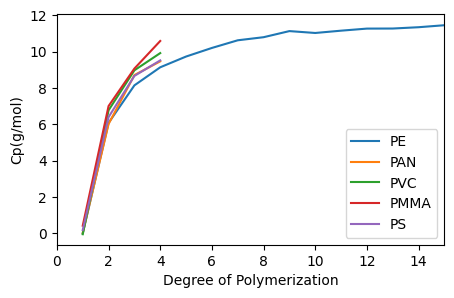

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))

for key,value in polymer_cp_ls.items():
    n,v_p,v_m_sum = value
    n =np.array(n)
    v_p =np.array(v_p)
    v_M_sum =np.array(v_m_sum)
    
    Cp = (v_m_sum-v_p)/n
    plt.plot(n,Cp)
plt.xlim(0,15)    
plt.xlabel("Degree of Polymerization")
plt.ylabel("Cp(g/mol)")    
plt.legend(polymer_cp_ls.keys())

In [ ]:
#収縮率
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))

for key,value in polymer_cp_ls.items():
    n,v_p,v_m_sum = value
    Ds = v_p/v_m_sum
    plt.plot(n,Ds)
plt.xlim(0,15)    
plt.xlabel("Degree of Polymerization")
plt.ylabel("Shrinkage factor")    
plt.legend(polymer_cp_ls.keys())

In [ ]:
import pandas as pd
df = pd.DataFrame(polymer_cp_ls)

In [ ]:
name = list(polymer_cp_ls.keys())
dp =  list(polymer_cp_ls.values())
Vp = pd.DataFrame([polymer_cp_ls[elem][1] for elem in name],index=name,columns = dp[0][0])
Vm_sum = pd.DataFrame([polymer_cp_ls[elem][2] for elem in name],index=name,columns = dp[0][0])


In [ ]:
Vp.to_csv("CSV/MM_shrinkage_vp.csv")
Vm_sum.to_csv("CSV/MM_shrinkage_vm_sum.csv")

In [ ]:
x = list(exp_polym_shrink.values())
y =1- Vp.loc[:,9].to_numpy()/Vm_sum.loc[:,9].to_numpy()
y2 =1- Vp.loc[:,5].to_numpy()/Vm_sum.loc[:,5].to_numpy()